# Analysis of KMM vs. uLSIF on Synthetic Data

8 Feb 2017

Test points normally distributed around origin. Training points uniformly distributed in 'box' around origin.

In [214]:
from IPython.core.display import HTML
HTML("<style>.container { width:99% !important; }</style>")

In [215]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import datetime

In [216]:
filename = '/Volumes/LocalDataHD/ds384/Dropbox/UoS_PhD/B_Academic/Quant_under_Dataset_Shift/Experiments/Python/Quantification_dataset_shift/Covariate_shift_reweighting_Dec16/data/G_test_results/KMM_vs_uLSIF_080217/KMM_vs_uLSIF_test_results_latest.csv'

In [217]:
df = pd.read_csv(filename)

In [218]:
df.head()

,i,tr_box_size,te_var,tr_point_dist,min_te_dist,mean_te_dist,num_tr,num_te,num_features,kernel_size,B,sigma,lambda,b,weight_KMM,weight_uLSIF
0,0,2,1,8.424693,5.927097,8.622943,300,20,10,8.616972,1000,1,0.001,10,0.000004,2.446596e-13
1,1,2,1,7.666905,6.954880,8.331903,300,20,10,8.616972,1000,1,0.001,10,0.000003,2.660134e-10
2,2,2,1,7.151827,6.058812,7.698313,300,20,10,8.616972,1000,1,0.001,10,0.000006,5.300419e-07
3,3,2,1,5.605899,4.370022,6.259114,300,20,10,8.616972,1000,1,0.001,10,0.908567,3.589437e-03
4,4,2,1,4.878601,2.924402,6.013723,300,20,10,8.616972,1000,1,0.001,10,0.000014,4.032823e-03


# Create additional columns

In [219]:
df['log_uLSIF'] = np.log(df['weight_uLSIF'])
df['log_KMM'] = np.log(df['weight_KMM'])

In [241]:
df.head()

,i,tr_box_size,te_var,tr_point_dist,min_te_dist,mean_te_dist,num_tr,num_te,num_features,kernel_size,B,sigma,lambda,b,weight_KMM,weight_uLSIF,log_uLSIF,log_KMM
0,0,2,1,8.424693,5.927097,8.622943,300,20,10,8.616972,1000,1,0.001,10,0.000004,2.446596e-13,-29.038909,-12.538520
1,1,2,1,7.666905,6.954880,8.331903,300,20,10,8.616972,1000,1,0.001,10,0.000003,2.660134e-10,-22.047474,-12.812362
2,2,2,1,7.151827,6.058812,7.698313,300,20,10,8.616972,1000,1,0.001,10,0.000006,5.300419e-07,-14.450310,-12.038151
3,3,2,1,5.605899,4.370022,6.259114,300,20,10,8.616972,1000,1,0.001,10,0.908567,3.589437e-03,-5.629760,-0.095886
4,4,2,1,4.878601,2.924402,6.013723,300,20,10,8.616972,1000,1,0.001,10,0.000014,4.032823e-03,-5.513289,-11.211895


# Explore where uLSIF gives weights

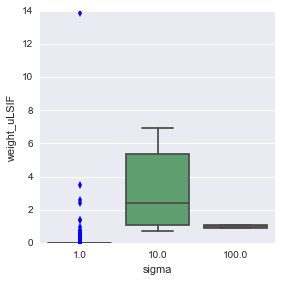

In [220]:
plot = sns.factorplot(x='sigma', y='weight_uLSIF', kind='box', data=df);
#sns.plt.ylim(-0.4, 0.4)

OK. Sigma needs to be 10

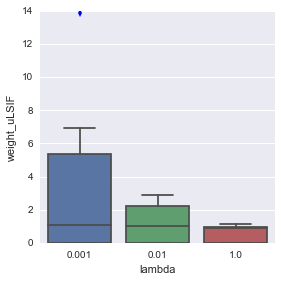

In [221]:
plot = sns.factorplot(x='lambda', y='weight_uLSIF', kind='box', data=df);
#sns.plt.ylim(-0.4, 0.4)

Try low values of lambda

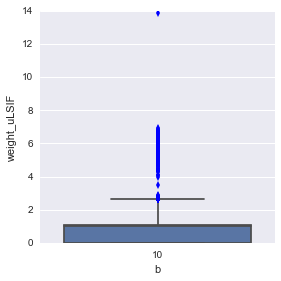

In [222]:
plot = sns.factorplot(x='b', y='weight_uLSIF', kind='box', data=df);
#sns.plt.ylim(-0.4, 0.4)

Try b=10

# Explore KMM weights by parameters

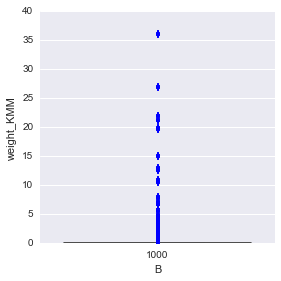

In [223]:
plot = sns.factorplot(x='B', y='weight_KMM', kind='box', data=df);

Try B=1000

## Apply filters to dataframe

In [224]:
df_filt = df
df_filt = df_filt[df_filt['B'] == 1000]
df_filt = df_filt[df_filt['sigma']==10]
df_filt = df_filt[df_filt['lambda']==0.001]
df_filt = df_filt[df_filt['b']==10]

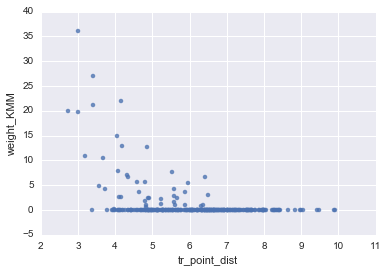

In [231]:
scatter = sns.regplot(x='tr_point_dist', y='weight_KMM', data=df_filt, fit_reg=False)
#sns.plt.xlim(0, 1)
#sns.plt.ylim(-0.4, 0.4)
#plt.title('a_hat_uu[0]_err vs. cl0_te_prop')
#plt.savefig('a_hat_ww[0]_err_vs_B_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.eps', format='eps')

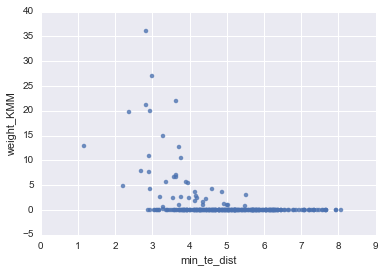

In [233]:
scatter = sns.regplot(x='min_te_dist', y='weight_KMM', data=df_filt, fit_reg=False)

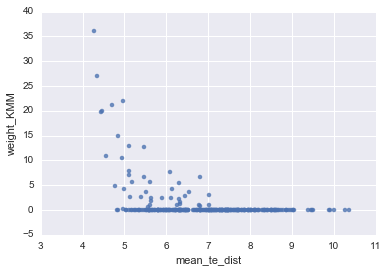

In [234]:
scatter = sns.regplot(x='mean_te_dist', y='weight_KMM', data=df_filt, fit_reg=False)

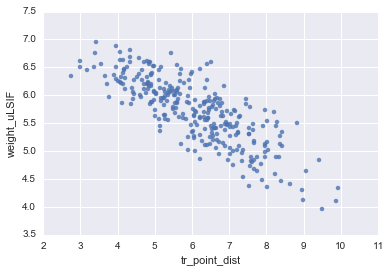

In [232]:
scatter = sns.regplot(x='tr_point_dist', y='weight_uLSIF', data=df_filt, fit_reg=False)
#sns.plt.ylim(0, 0.00002)

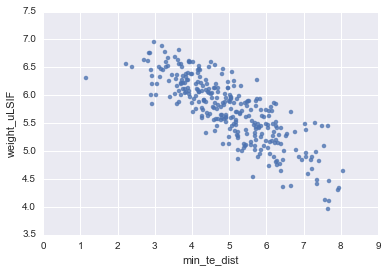

In [235]:
scatter = sns.regplot(x='min_te_dist', y='weight_uLSIF', data=df_filt, fit_reg=False)

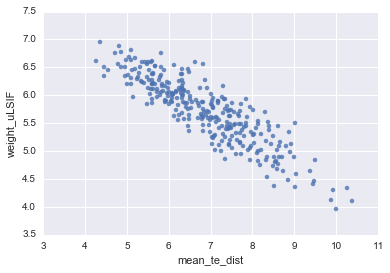

In [236]:
scatter = sns.regplot(x='mean_te_dist', y='weight_uLSIF', data=df_filt, fit_reg=False)

In [227]:
np.max(df_filt['weight_uLSIF'])

6.952477595294392

In [228]:
np.sum(df_filt['weight_uLSIF'])

1715.985478880141

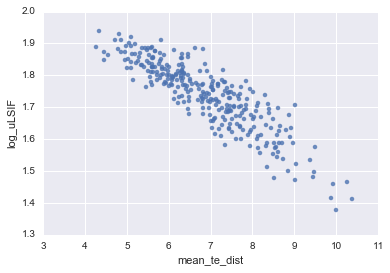

In [240]:
scatter = sns.regplot(x='mean_te_dist', y='log_uLSIF', data=df_filt, fit_reg=False)

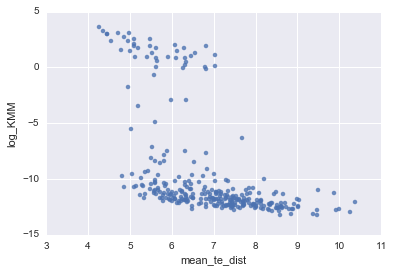

In [238]:
scatter = sns.regplot(x='mean_te_dist', y='log_KMM', data=df_filt, fit_reg=False)